<a href="https://colab.research.google.com/github/jelade/AMMI_PROJECT1_G8/blob/main/gradient_descent_tutorials_Jaleel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AMMI tutorials on parameter search methods

Hi there!,

In this tutorial, we will look at how to find parameters of a simple linear regression problem using;

* batch gradient descent 
* stochastic gradient descent
* mini-batch gradient descent

In [ ]:
import numpy as np # imports
import matplotlib.pyplot as plt
np.random.seed(10)

In [ ]:
def plot(X, y, theta, epoch, plot_every=1):
  """Plotting function for features and targets"""
  if plot_every is not None and epoch % plot_every == 0:
    xtest = np.linspace(0, 1, 10).reshape(-1,1)
    ypred = linear_function(xtest, theta).reshape(-1,1)
    plt.scatter(X, y, marker="+")
    plt.xlabel("feature")
    plt.ylabel("target")
    plt.plot(xtest, ypred, color="orange")
    plt.show()


In [ ]:
# from time import sleep
def plot_loss(losses):
  """Plotting function for losses"""
  plt.plot(losses)
  plt.xlabel("epoch")
  plt.ylabel("loss")
  plt.title("training curve")

Lets begin with some randomly generated data. Plots will allow us visualise the data and functions we approximate along the way

In [ ]:
xtrain = np.linspace(0,1, 10)
ytrain = xtrain + np.random.normal(0, 0.1, (10,))

xtrain = xtrain.reshape(-1, 1)
ytrain = ytrain.reshape(-1, 1)

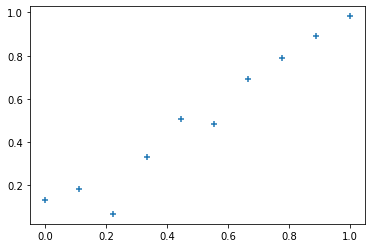

In [ ]:
plt.scatter(xtrain, ytrain, marker="+")

In class, we learnt that, when developing a machine learning solution to a problem,  we need a few things;
  - Data {features, targets}
  - Hypothesis (based of the relationship we observe between features and targets)
  - A criterion (A function evaluates our hypothesis)
  - A learning algorithm (An algorithm to find the best parameters for our hypothesis)

# Hypothesis
Lets begin with the hypothesis

Here, in our one dimensional data, its easy to observe and linear relationship between our features and targets. So we may settle on the linear function below

$$y = X\theta$$

where, $X \in \mathbb{R}^{N x D}, \theta \in \mathbb{R}^{D}, y \in \mathbb{R}^N$

In [ ]:
def linear_function(X, theta):
  """
  Compute the dot product of X$\theta$
  Args:
    X: feature matrix (size - N x D)
    theta: parameters (size - D x 1)
  
  Returns:
    output y, size N x 1
  """
  assert X.ndim > 1
  assert theta.ndim > 1
  return np.dot(X, theta)

## Criterion/ Loss function
Since we have a continuous label, this problem is essentially a regression one and we can use a mean squared error loss.

This is given as $$L(\theta) = \frac{1}{N}∑(y - {\bar y})^2$$
where $y$ is the targets and $\bar y$ is the output of our hypothesis

In [ ]:
def mean_squared_error(ytrue, ypred):
  """
  Computes the mean squared error
  Args: 
    ytrue: vector of true labels
    ypred: vector of predicted labels

  Returns:
    mse loss (scalar)
  """

  return np.mean((ytrue - ypred)**2)

## Gradient descent

Now, our learning algorithm!

We have already seen how to compute closed form solution for our linear regression problem using the maximum likelihood estimation. Here, we use a gradient descent technique. The idea is to take little steps in the direction of minimal loss. The gradients when computed guides us in what direction to take these little steps. 

A full training loop using gradient descent algorithm will follow these steps;
- initialise parameters
- Run some number of epochs
  - use parameters to make predictions
  - Compute and store losses
  - Compute gradients of the loss wrt parameters
  - Use gradients to update the parameters
- Do anything else or End!

Lets write a few lines of code that does a part of each of these steps before the main training loop

In [ ]:
def initialize_theta(D):
  """Initializes parameter theta
  Args:
    D: size of parameter
  Returns:
    initial parameters of size D
  """
  return np.zeros([D, 1])

In [ ]:
def batch_gradient(X, y, theta):
  """Computes gradients of loss wrt parameters for a full batch
  Args:
    X: input features of size - N x D
    y: target vector of size - N x 1
    theta: parameters of size - D x 1
  """
  return -2.0 * np.dot(X.T, (y - linear_function(X, theta)))

In [ ]:
def update_function(theta, grads, step_size):
  """Updates parameters with gradients 
  Args: 
    theta : parameters of size D x 1
    grads: gradients of size D x 1

  Returns:
    updated parameters of size D x 1
  """
  return theta - step_size * grads

In [ ]:
def train_batch_gradient_descent(X, y, num_epochs, step_size=0.1, plot_every=1):
  """
  Trains model with full batch gradient descent
  """
  N, D = X.shape
  theta = initialize_theta(D)
  losses = []
  for epoch in range(num_epochs): # Do some iterations
    ypred = linear_function(X, theta) # make predictions with current parameters
    loss = mean_squared_error(y, ypred) # Compute mean squared error
    grads = batch_gradient(X, y, theta) # compute gradients of loss wrt parameters
    theta = update_function(theta, grads, step_size) # Update your parameters with the gradients
    
    losses.append(loss)
    print(f"\nEpoch {epoch}, loss {loss}")
    plot(X, y, theta, epoch, plot_every)
  return losses


Epoch 0, loss 0.35154247678265527


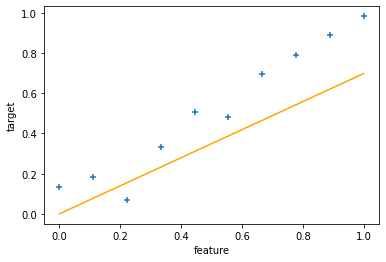


Epoch 1, loss 0.0360299786273172

Epoch 2, loss 0.00833066466031905


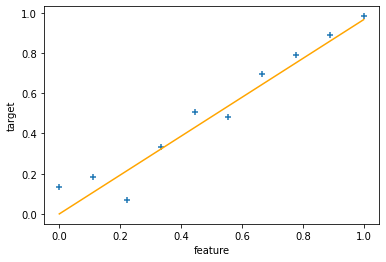


Epoch 3, loss 0.005898900471172437

Epoch 4, loss 0.005685412257036109


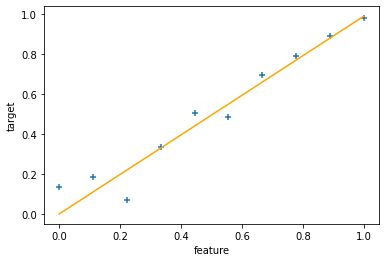


Epoch 5, loss 0.005666669807509738

Epoch 6, loss 0.005665024379842128


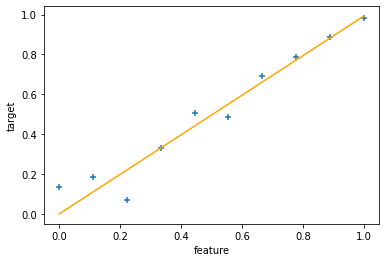


Epoch 7, loss 0.005664879925286946

Epoch 8, loss 0.0056648672434055575


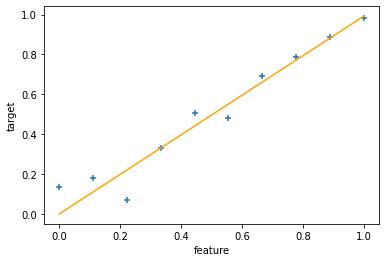


Epoch 9, loss 0.00566486613004423


In [ ]:
batch_gradient_descent_losses = train_batch_gradient_descent(xtrain, ytrain, 10, plot_every=2)

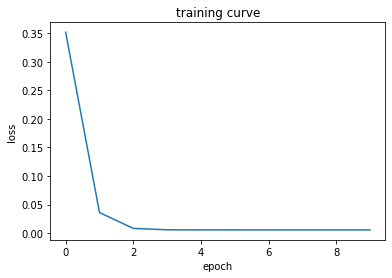

In [ ]:
plot_loss(batch_gradient_descent_losses)

Observations:
  1. What do you observe in the plots
  2. You may try different number of epochs
One more thing, it seems the train curve flattens out so quickly, yet, training still progresses regardless. 

Can you think of how to avoid the unnecessary training after converging, 
Right!... 
- You may end the training when we hit a threshold loss value
- Early stopping - stop the training when loss does not change after a certain number of epochs (patience)

## Stochastic Gradient Descent

Stochastic gradient Descent unlike batch gradient descent, pick random sample(s) or subset of samples and updates parameters with their gradients

Below, we will write code that gets a single sample and computes gradients for that sample.

Its also important we shuffle our data


In [ ]:
def per_sample_gradient(xi, yi, theta):
  """Computes the gradient for a single sample
  Args: 
    xi: vector of sample features, size 1 x D
    yi: sample target, size 1(scalar)
  Returns
  """
  return -2.0 * xi * (yi - linear_function(xi, theta))

In [ ]:
def shuffle_data(X, y):
  """Shuffles the data
  Args:
    X: input features of size - N x D
    y: target vector of size - N x 1

  Returns:
    shuffled data
  """
  N, _ = X.shape
  shuffled_idx = np.random.permutation(N)
  return X[shuffled_idx], y[shuffled_idx]

In [ ]:
def train_with_sgd(X, y, num_epochs, step_size, plot_every=1):
  """Train with stochastic gradient descent"""
  N, D = X.shape
  theta = initialize_theta(D)
  losses = []
  epoch = 0
  loss_tolerance = 0.001
  avg_loss = float("inf")

  while epoch < num_epochs and avg_loss > loss_tolerance:
    running_loss = 0.0
    shuffled_x, shuffled_y = shuffle_data(X, y)

    for idx in range(shuffled_x.shape[0]):
      sample_x = shuffled_x[idx].reshape(-1, D)
      sample_y = shuffled_y[idx].reshape(-1, 1)
      ypred = linear_function(sample_x, theta)
      loss = mean_squared_error(sample_y, ypred)
      running_loss += loss
      grads = per_sample_gradient(sample_x, sample_y, theta)
      theta = update_function(theta, grads, step_size)

    plot(X, y, theta, epoch, plot_every)
    avg_loss = running_loss/ X.shape[0]
    losses.append(avg_loss)
    print(f"Epoch {epoch}, loss {avg_loss}")

    epoch += 1

  return losses

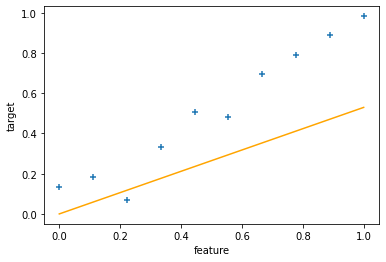

Epoch 0, loss 0.2103820267683661
Epoch 1, loss 0.05024067586164357


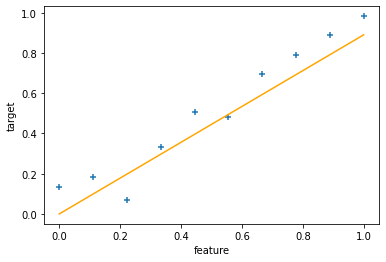

Epoch 2, loss 0.015414514302820037
Epoch 3, loss 0.007894697130399761


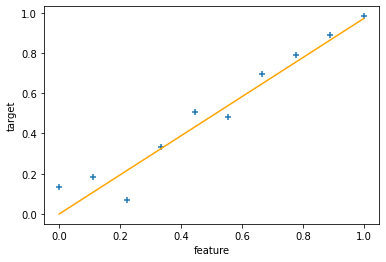

Epoch 4, loss 0.006226876725107555
Epoch 5, loss 0.0058362404024892445


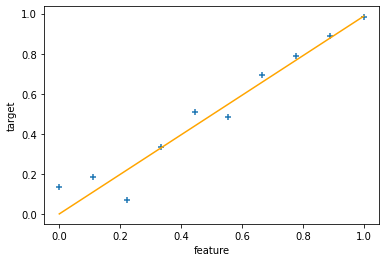

Epoch 6, loss 0.0057671995357135835
Epoch 7, loss 0.005732257516511896


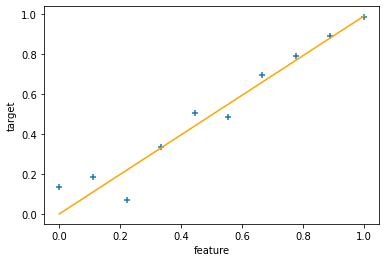

Epoch 8, loss 0.005717709120845093
Epoch 9, loss 0.005756640592901938


In [ ]:
#Now, lets train!
sgd_losses = train_with_sgd(xtrain, ytrain, num_epochs=10, step_size=0.1, plot_every=2)

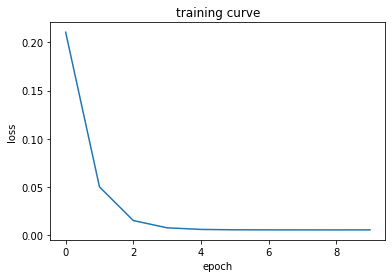

In [ ]:
plot_loss(sgd_losses)

Now, we observe that SGD converges pretty well as well.

Now lets attempt to choose a slightly bigger step_size also known as the learning rate.

What do you observe???

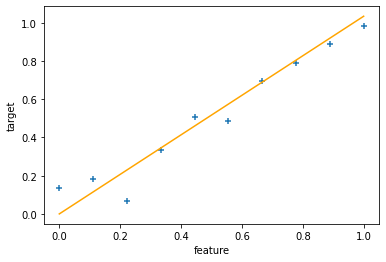

Epoch 0, loss 0.40106569625839195
Epoch 1, loss 0.01002049562004271
Epoch 2, loss 0.013184820963683608
Epoch 3, loss 0.07859994821588033
Epoch 4, loss 0.026074349905365012
Epoch 5, loss 0.008950367973342518
Epoch 6, loss 0.09568288416372109
Epoch 7, loss 0.01553830578521263
Epoch 8, loss 0.010446272011717113
Epoch 9, loss 0.22064885733413736


In [ ]:
sgd_large_step_size_losses = train_with_sgd(xtrain, ytrain, 10, step_size=2.0, plot_every=10)

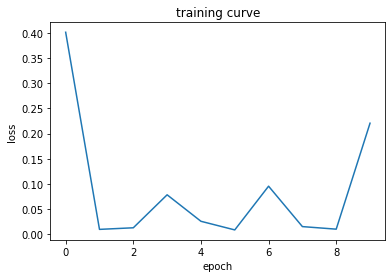

In [ ]:
plot_loss(sgd_large_step_size_losses)

In [ ]:
def get_momentum(momentum, grad, beta):
  return beta * momentum + (1. - beta) * grad

In [ ]:
def train_sgd_with_momentum(X, y, num_epochs, step_size, beta, plot_every=1):
  """Train with stochastic gradient descent"""
  N, D = X.shape
  theta = initialize_theta(D)
  losses = []
  epoch = 0
  loss_tolerance = 0.001
  avg_loss = float("inf")

  while epoch < num_epochs and avg_loss > loss_tolerance:
    momentum = 0.0
    running_loss = 0.0
    shuffled_x, shuffled_y = shuffle_data(X, y)

    for idx in range(shuffled_x.shape[0]):
      sample_x = shuffled_x[idx].reshape(-1, D)
      sample_y = shuffled_y[idx].reshape(-1, 1)
      ypred = linear_function(sample_x, theta)
      loss = mean_squared_error(sample_y, ypred)
      running_loss += loss
      grad = per_sample_gradient(sample_x, sample_y, theta)
      momentum = get_momentum(momentum, grad, beta)
      theta = update_function(theta, momentum, step_size)

    plot(X, y, theta, epoch, plot_every)
    avg_loss = running_loss/ X.shape[0]
    losses.append(avg_loss)
    print(f"Epoch {epoch}, loss {avg_loss}")

    epoch += 1

  return losses

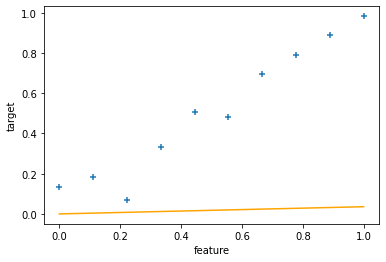

Epoch 0, loss 0.34401691260749406


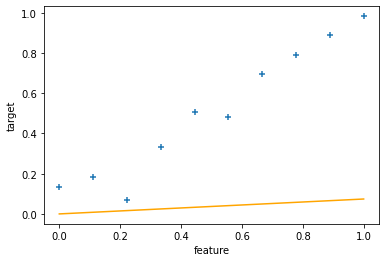

Epoch 1, loss 0.32170417189729145


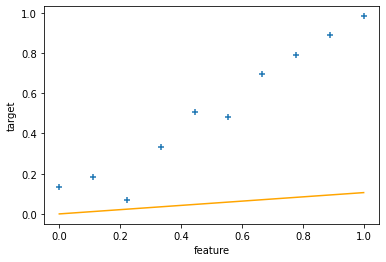

Epoch 2, loss 0.2962919570192814


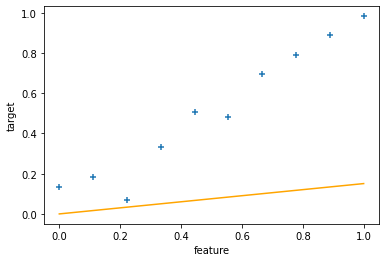

Epoch 3, loss 0.2772057859967543


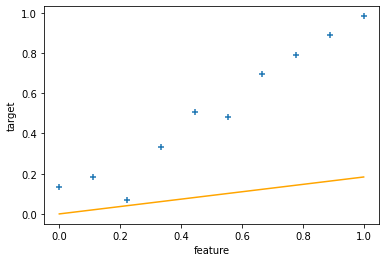

Epoch 4, loss 0.24818693859234214


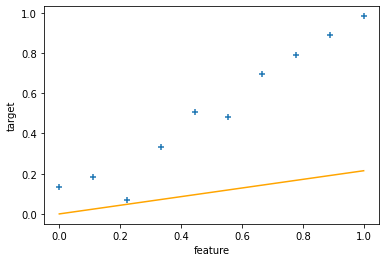

Epoch 5, loss 0.22961658248545697


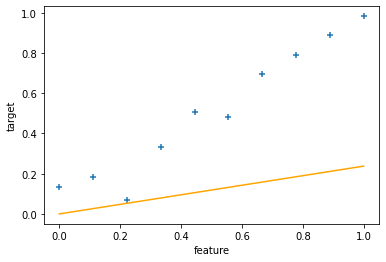

Epoch 6, loss 0.21397282143093777


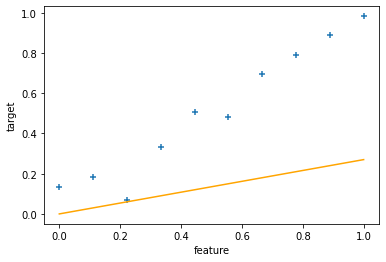

Epoch 7, loss 0.20143088706378776


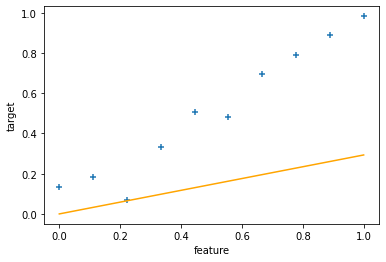

Epoch 8, loss 0.18516380087269407


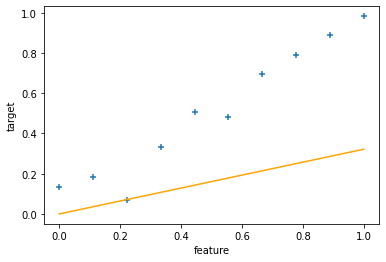

Epoch 9, loss 0.17385768373466423


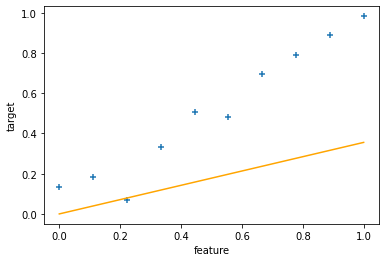

Epoch 10, loss 0.1609849385513704


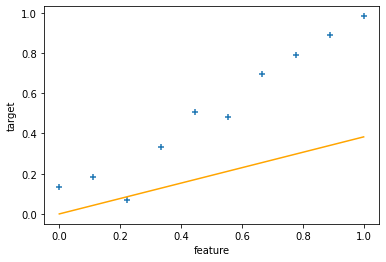

Epoch 11, loss 0.14555393659692534


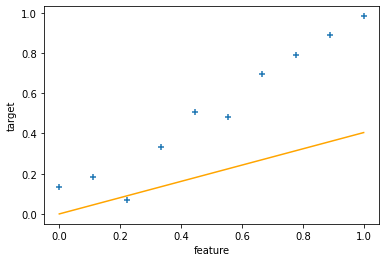

Epoch 12, loss 0.13322786279143833


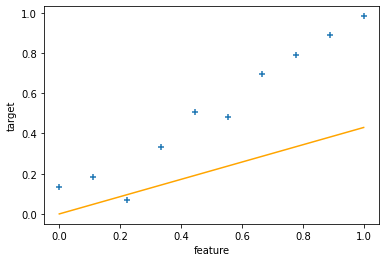

Epoch 13, loss 0.12415557497056337


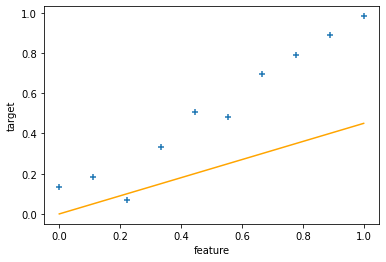

Epoch 14, loss 0.11371997637394127


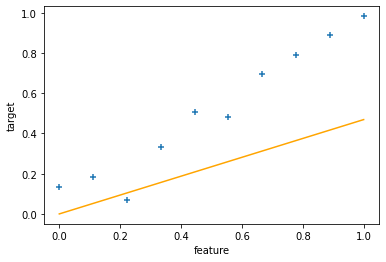

Epoch 15, loss 0.10680205420775506


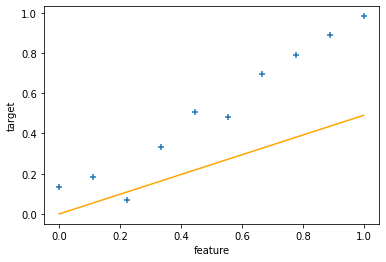

Epoch 16, loss 0.09943697396004184


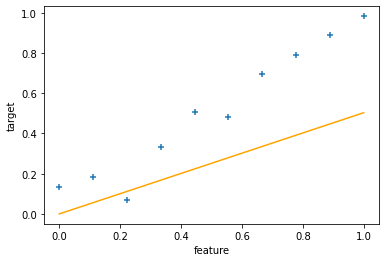

Epoch 17, loss 0.09239950540995423


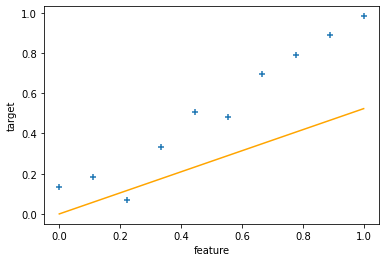

Epoch 18, loss 0.08820699433484586


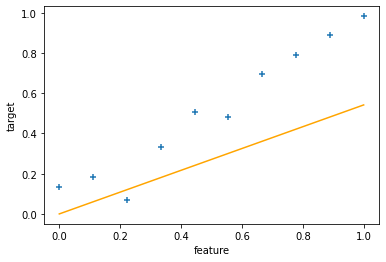

Epoch 19, loss 0.0813938791195993


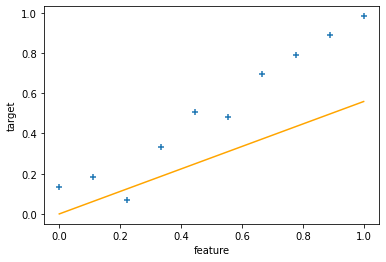

Epoch 20, loss 0.07532805583564942


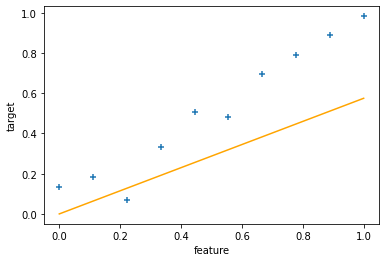

Epoch 21, loss 0.07046413373287652


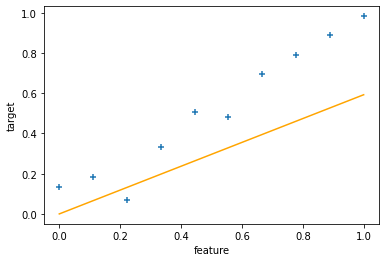

Epoch 22, loss 0.06577099421032272


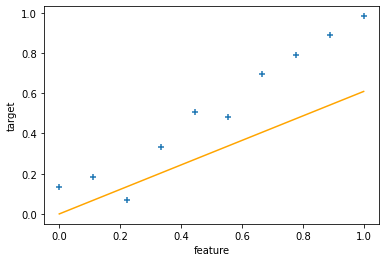

Epoch 23, loss 0.060185215669020506


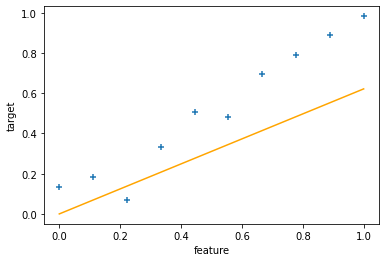

Epoch 24, loss 0.05601355375295364


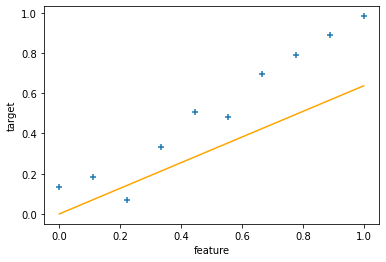

Epoch 25, loss 0.05293287672914234


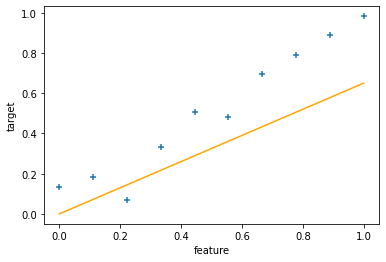

Epoch 26, loss 0.04892195887773968


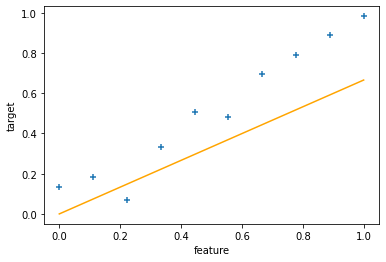

Epoch 27, loss 0.04593020236755771


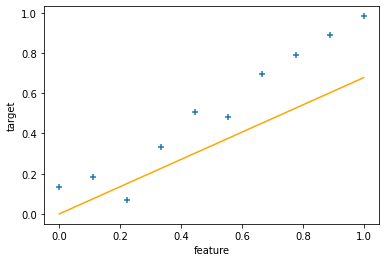

Epoch 28, loss 0.04219436071365392


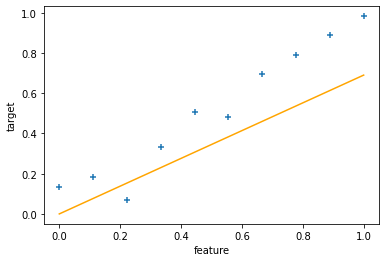

Epoch 29, loss 0.039563487487976244


In [ ]:
sgd_momentum_losses = train_sgd_with_momentum(xtrain, ytrain, 30, 0.1, beta=0.99)

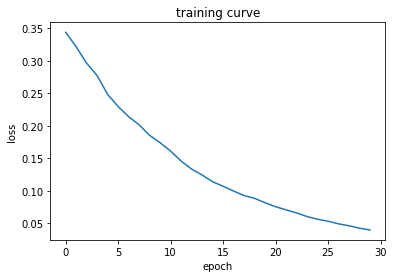

In [ ]:
plot_loss(sgd_momentum_losses)

Notes
- What do you observe here? 
  - Its as though sgd with momentum takes a little longer than without to converge. Here, we check convergence by looking at the training curve. No convergence yet because the curve was still going down when the training ended.
- We can choose to train a little longer or increase the learning rate.

- Now lets try with larger ones, `step_size = 2.0` and `num_epochs=30`
You can compare training without momentum and training with momentum by setting the `beta=0` or `beta=0.99` respectively 

Epoch 0, loss 0.43254383558213644
Epoch 1, loss 0.12917127941894657
Epoch 2, loss 0.09256420459950017
Epoch 3, loss 0.41786042223936387
Epoch 4, loss 0.038908077305451885
Epoch 5, loss 0.02819482180310396
Epoch 6, loss 0.016009708110460458
Epoch 7, loss 0.043489728014934184
Epoch 8, loss 0.0157813176829936
Epoch 9, loss 0.022373563191307552


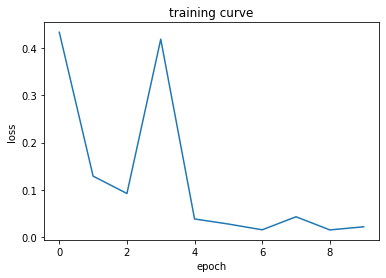

In [ ]:
# Without momentum
sgd_momentum_losses_large_stepsize = train_sgd_with_momentum(xtrain, ytrain, 10, 2.0, beta=0.0, plot_every=None)
plot_loss(sgd_momentum_losses_large_stepsize)

Epoch 0, loss 0.2489189344158637
Epoch 1, loss 0.01670805029622629
Epoch 2, loss 0.006040050553940271
Epoch 3, loss 0.0057111225302885855
Epoch 4, loss 0.005702132139177149
Epoch 5, loss 0.005734933410532023
Epoch 6, loss 0.005703310722430528
Epoch 7, loss 0.0056991306402118455
Epoch 8, loss 0.005830016599507196
Epoch 9, loss 0.005732084283359735


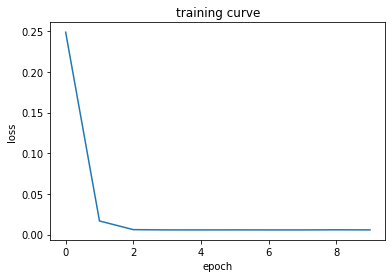

In [ ]:
# With momentum
sgd_momentum_losses_large_stepsize = train_sgd_with_momentum(xtrain, ytrain, 10, 2.0, beta=0.99, plot_every=None)
plot_loss(sgd_momentum_losses_large_stepsize)

Notes
- Do you realise that even with the large step size that we used before, our loss function is still smoothen out (with almost no oscillation) ?

## Mini-batch gradient Descent

Now, lets finish off with Mini-batch gradient descent

Here, instead of computing gradients for an entire dataset, we divide the data into batches, each batch has the size `batch_size` which we set ourselves except the last batch. You know why?

There are a few things to note here;

- Since we are taking a batch at a time, when computing loss, we need to do it for the batch, then we average over all sample points.

In [ ]:
def minibatch_gradient_descent(X, y, num_epochs, step_size=0.1, batch_size=3, plot_every=1):
  N, D = X.shape
  theta = initialize_theta(D)
  losses = []
  num_batches = N//batch_size
  X, y = shuffle_data(X, y) # shuffle the data

  for epoch in range(num_epochs): # Do some iterations
    running_loss = 0.0
    
    for batch_idx in range(0, N, batch_size):
      x_batch = X[batch_idx: batch_idx + batch_size] # select a batch of features
      y_batch = y[batch_idx: batch_idx + batch_size] # and a batch of labels

      ypred = linear_function(X, theta) # make predictions with current parameters
      loss = mean_squared_error(y, ypred) # Compute mean squared error
      grads = batch_gradient(X, y, theta) # compute gradients of loss wrt parameters
      theta = update_function(theta, grads, step_size) # Update your parameters with the gradients
      running_loss += (loss * x_batch.shape[0]) # loss is mean for a batch, dividing by N_batch gives 
                                                # us a sum for the batch so we can average later by diving 
                                                # by the full data size
    
    avg_loss = running_loss/ N
    losses.append(avg_loss)
    print(f"\nEpoch {epoch}, loss {avg_loss}")
    plot(X, y, theta, epoch, plot_every)
  return losses


Epoch 0, loss 0.11936082606820467


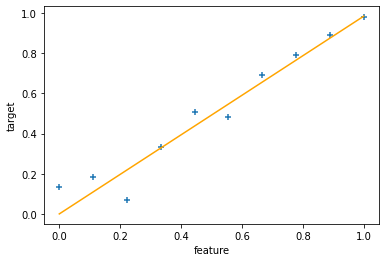


Epoch 1, loss 0.0056716199258450865


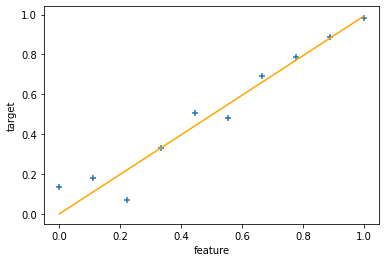


Epoch 2, loss 0.00566486642409706


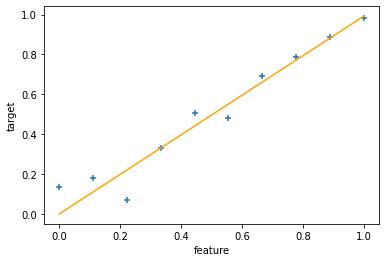


Epoch 3, loss 0.005664866022917497


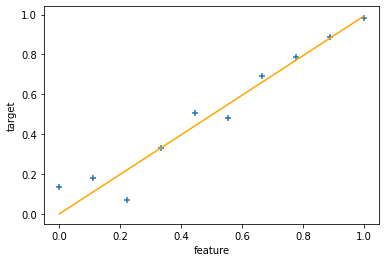


Epoch 4, loss 0.005664866022893667


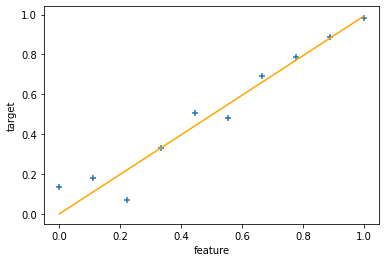


Epoch 5, loss 0.0056648660228936654


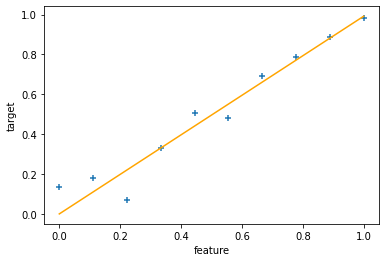


Epoch 6, loss 0.0056648660228936654


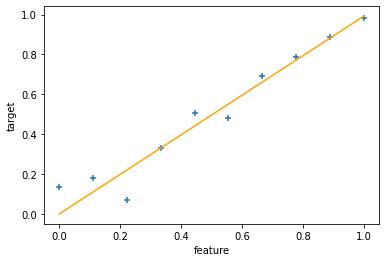


Epoch 7, loss 0.0056648660228936654


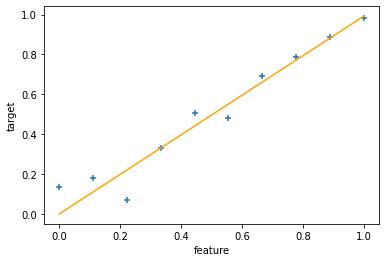


Epoch 8, loss 0.0056648660228936654


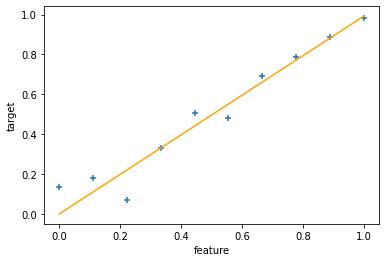


Epoch 9, loss 0.0056648660228936654


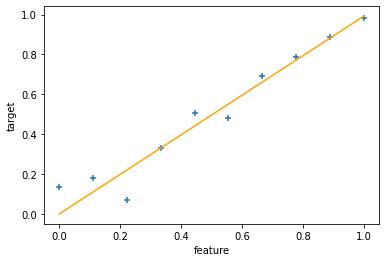

In [ ]:
mini_batch_gd_losses = minibatch_gradient_descent(xtrain, ytrain, 10, step_size=0.1, batch_size=3)

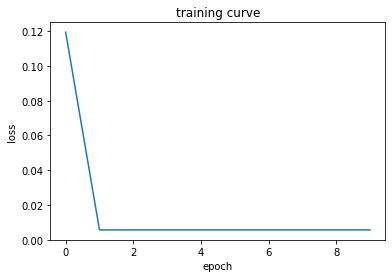

In [ ]:
plot_loss(mini_batch_gd_losses)

Next
 - Early stopping - stopping when training reaches converges before all number of epochs are executed.

 - You can try learning rate scheduling, where instead of using the same learning rate in every single epoch, you can define a number of them at different epochs